# Analysis on Personal Spending

### Import bank transactions
### Extrapolate into the future

notes: 
Opting to split between loan and transaction accounts believe the latter can be analysed to best analyse spending

In [97]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
#issues with two files (credit card + savingss) having values containing commas, breaking out the value to multiple columns and causing errors
#manually opening the CSV files and correctin - would be to automate the correctin of these catw
#ideally I'd export in a different format, or rpelace the commas before epxortin  but neither are possible in this case

#folder containing one or more csv file to import
inputfolder = 'C:\\Users\\mcleodb\\Documents\\SpendFiles 20210405\\'
os.chdir(inputfolder)
files = os.listdir()
templist = []
#import each file to temp dataframe and append to the main one - adding column to capture the source
for i in files:
    loc = inputfolder + i
    print('import file: ',loc)
    tempdf = pd.read_csv(loc)
    tempdf['sourcefile'] = i
    templist.append(tempdf)
    dfraw = pd.concat(templist)

import file:  C:\Users\mcleodb\Documents\SpendFiles 20210405\creditcard trans050421.csv
import file:  C:\Users\mcleodb\Documents\SpendFiles 20210405\export.csv
import file:  C:\Users\mcleodb\Documents\SpendFiles 20210405\loan fixed trans050421.csv
import file:  C:\Users\mcleodb\Documents\SpendFiles 20210405\loan variable trans050421.csv
import file:  C:\Users\mcleodb\Documents\SpendFiles 20210405\savings trans050421.csv


In [99]:
#data cleaning - formatting dates, and consolidating debit/credit to single column
dfraw['Debit_neg'] = dfraw['Debit'] * -1
dfraw['amount'] = dfraw[['Debit_neg','Credit']].sum(axis=1)
df_all = dfraw[['Description', 'amount', 'Category',
       'SubCategory', 'sourcefile']].copy() 
df_all['date'] = pd.to_datetime(dfraw['Date'],format=r'%Y%m%d')

#I like the idea of having a column to denote if charge is a debit or credit
df_all['charge'] = df_all.amount.apply(lambda x: 'debit' if x <= 0 else 'credit')

#move credit/debit amounts to their own columns to keep them separating when aggregateing the dataset
df_all['outgoing'] = df_all.amount.apply(lambda x: x if x < 0 else 0)
df_all['incoming'] = df_all.amount.apply(lambda x: x if x >= 0 else 0)

#filter after 1/5/20 to exclude some initial loan transfers which are not meaningful for this analysis
df_all = df_all[df_all['date'] >= '2020-05-01']
df_all.to_csv('export.csv')

#create a subset which excludes the loan accounts
df_spend = df_all[df_all['sourcefile'].str.match('sav')]
df_spend = df_spend.append(df_all[df_all['sourcefile'].str.match('credit')])


In [101]:
df_spend.set_index('date', inplace=True)    

In [102]:
df_spend.head()

,Description,amount,Category,SubCategory,sourcefile,charge
date,,,,,,
2021-03-11,Visa Purchase 09Mar Spotify P1...,-11.99,Entertainment & Recreation,TV Moves Music & Games,savings trans050421.csv,debit
2021-03-06,Visa Purchase 04Mar Netflix Co...,-15.99,Entertainment & Recreation,TV Moves Music & Games,savings trans050421.csv,debit
2021-02-11,Visa Purchase 09Feb Spotify P1...,-11.99,Entertainment & Recreation,TV Moves Music & Games,savings trans050421.csv,debit
2021-02-05,Visa Purchase 03Feb Netflix.Co...,-15.99,Entertainment & Recreation,TV Moves Music & Games,savings trans050421.csv,debit
2021-01-12,Visa Purchase 09Jan Spotify P1...,-11.99,Entertainment & Recreation,TV Moves Music & Games,savings trans050421.csv,debit


In [103]:
df_spend['sourcefile'].value_counts()

savings trans050421.csv       906
creditcard trans050421.csv    386
Name: sourcefile, dtype: int64

<AxesSubplot:xlabel='date'>

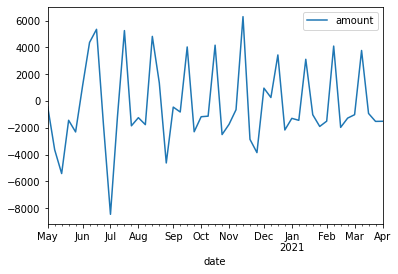

In [104]:
#weekly debit/credits on savings & cc account
df_spend.resample('W').sum().plot()

<AxesSubplot:xlabel='date'>

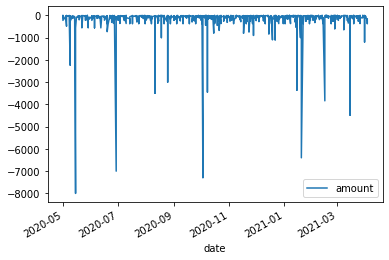

In [105]:
#weekly debit/credits on savings & cc account
df_spend[df_spend['charge'] == 'debit'].plot()

<AxesSubplot:xlabel='date'>

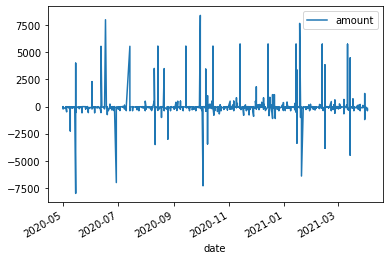

In [106]:

#df_spend[df_spend['charge'] == 'debit' | df_all['amount'] < -5000]
df_spend.plot()

In [107]:
df_spend[df_spend['amount']> 4500]

,Description,amount,Category,SubCategory,sourcefile,charge
date,,,,,,
2021-03-12,Nationwide News 150696000000000000,5749.38,Income,Salary,savings trans050421.csv,credit
2021-02-12,Nationwide News 150696000000000000,5749.38,Income,Salary,savings trans050421.csv,credit
2021-01-18,Cgu Insurance 02201602706921,7662.97,Deposits,Insurance,savings trans050421.csv,credit
2021-01-14,Nationwide News 150696000000000000,5749.39,Income,Salary,savings trans050421.csv,credit
2020-12-14,Nationwide News 150696000000000000,5749.39,Income,Salary,savings trans050421.csv,credit
2020-11-13,Nationwide News 150696000000000000,5749.38,Income,Salary,savings trans050421.csv,credit
2020-10-14,Nationwide News 150696000000000000,5554.39,Income,Salary,savings trans050421.csv,credit
2020-09-30,Ato Ato002000013753463,8399.16,Government payments,Tax refunds,savings trans050421.csv,credit
2020-09-14,Nationwide News 150696000000000000,5554.38,Income,Salary,savings trans050421.csv,credit


<AxesSubplot:xlabel='date'>

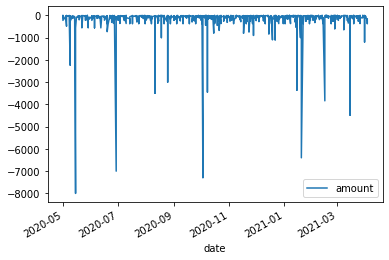

In [108]:

df_spend[df_spend['charge'] == 'debit'].plot()
#what are these extreme values (ie < 4000)

In [109]:

df_spend[(df_spend['charge'] == 'debit') & (df_spend['amount'] > -5)]

,Description,amount,Category,SubCategory,sourcefile,charge
date,,,,,,
2021-03-31,Debit Interest,-0.18,Fees & Charges,Fees & Charges,savings trans050421.csv,debit
2021-03-29,Atm Operator Fee Inq 28Mar11:12 Cashc...,-2.90,Fees & Charges,Fees & Charges,savings trans050421.csv,debit
2021-03-26,Atm Operator Fee Wdl 26Mar16:58 Cashc...,-2.50,Fees & Charges,Fees & Charges,savings trans050421.csv,debit
2021-02-27,Debit Interest,-0.05,Fees & Charges,Fees & Charges,savings trans050421.csv,debit
2021-02-26,Loan Repayment S.212.2298162.00,-0.59,Home & Property,Mortgage & Rent,savings trans050421.csv,debit
...,...,...,...,...,...,...
2020-12-14,Central Coast Counci Gosford Au,-0.77,Bills & Payments,Professional & Govt services,creditcard trans050421.csv,debit
2020-12-14,Transportfornsw Tap Sydney Au,-2.52,Transport & Travel,Public transport,creditcard trans050421.csv,debit
2020-12-09,Foreign Transaction Fee,-0.69,Fees & Charges,Fees & Charges,creditcard trans050421.csv,debit


In [110]:
df_spend.groupby('Category').mean()

,amount
Category,
Bills & Payments,-153.811589
Deposits,901.287632
Entertainment & Recreation,-37.972237
Fees & Charges,-13.025333
Food & Beverage,-42.430745
Government payments,428.110741
Home & Property,-246.190075
Income,5651.884000
Retail & Personal,-74.355641


In [125]:

#simple moving average for monthly debit spending
df_spend['Debit_SMA_1M'] = df_spend[df_spend['charge']=='debit'].resample('M').sum().rolling(window=1).mean()
df_spend['Debit_SMA_2M'] = df_spend.amount[df_spend['charge']=='debit'].resample('M').sum().rolling(window=2).mean()
df_spend['Debit_SMA_3M'] = df_spend.amount[df_spend['charge']=='debit'].resample('M').sum().rolling(window=3).mean()

In [137]:
# # plot it
# plt.figure(figsize=[15,10])
# plt.grid(True)
# plt.plot(df_spend['Debit_SMA_1M'], label = 'SMA 1 Month (Debits')    
# plt.legend(loc=1)

In [138]:
df_spend[df_spend['charge']=='debit'].resample('M').sum().rolling(window=1).mean()

,amount,Debit_SMA_1M,Debit_SMA_3M,Debit_SMA_2M
date,,,,
2020-05-31,-17210.33,0.00,0.000000,0.000
2020-06-30,-14191.63,0.00,0.000000,0.000
2020-07-31,-7046.18,-28184.72,-51264.186667,-42475.620
2020-08-31,-14333.40,-28666.80,-23714.140000,-21379.580
2020-09-30,-7562.29,-22686.87,-28941.870000,-32843.535
2020-10-31,-21985.90,-65957.70,-43881.590000,-44322.285
2020-11-30,-10770.98,-53854.90,-67198.616667,-81892.200
2020-12-31,-11840.58,-71043.48,-89194.920000,-67834.680
2021-01-31,-20649.09,0.00,0.000000,0.000


In [ ]:
#TODO - create dataframe aggregated to day level
#TODO - create separate columns for debit/credit amounts to enable separate analysis even after resample/agg

In [159]:
df_all[df_all['charge']=='credit']

,Description,amount,Category,SubCategory,sourcefile,date,charge,outgoing,incoming
57,Phone/Internet Tfr From 0000415796004,4488.27,Deposits,Funds transfer,creditcard trans050421.csv,2021-03-15,credit,0.0,4488.27
141,Phone/Internet Tfr From 0000415796004,3839.40,Deposits,Funds transfer,creditcard trans050421.csv,2021-02-15,credit,0.0,3839.40
226,Phone/Internet Tfr From 0000415796004,3364.36,Deposits,Funds transfer,creditcard trans050421.csv,2021-01-15,credit,0.0,3364.36
284,Phone/Internet Tfr From 0000415796004,365.95,Deposits,Funds transfer,creditcard trans050421.csv,2020-12-31,credit,0.0,365.95
297,Phone/Internet Tfr From 0000415796004,840.94,Deposits,Funds transfer,creditcard trans050421.csv,2020-12-16,credit,0.0,840.94
...,...,...,...,...,...,...,...,...,...
786,"Mcleod, Bryden R",209.03,Deposits,Deposit,savings trans050421.csv,2020-06-22,credit,0.0,209.03
801,Internet Deposit 17Jun08:51 Savin...,8000.00,Deposits,Deposit,savings trans050421.csv,2020-06-17,credit,0.0,8000.00
808,Nationwide News 150696000000000000,5554.39,Income,Salary,savings trans050421.csv,2020-06-12,credit,0.0,5554.39
831,Internet Deposit 02Jun12:39 From ...,2300.00,Deposits,Deposit,savings trans050421.csv,2020-06-02,credit,0.0,2300.00
